In [1]:
import utils.dataset as dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


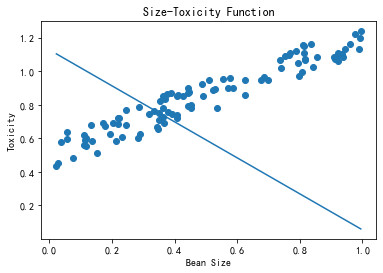

In [2]:
## Create a dataset
n = 100
xs, ys = dataset.get_beans2(n)
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)

# randomly initialize the weights
w = np.random.randn(1)
b = np.random.randn(1)
y_pre = w*xs+b
plt.plot(xs, y_pre)
plt.show()


In [4]:
# define the function
def f(x):
    return x*w+b


def MSE(x, y):
    return (1/x.shape[0])*np.sum((f(x)-y)**2)




def gradient(x, y):
    try:
        return (1/x.shape[0])*2*np.sum((f(x)-y)*x)
    except:
        return 2*np.sum((f(x)-y)*x)

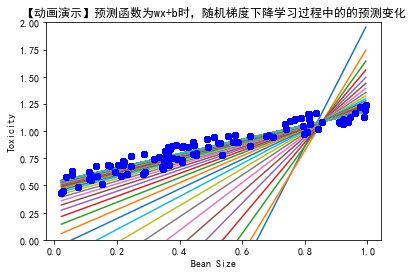

In [30]:
# SGD
w = 10
b = 10
alpha=0.02

ims = []
fig = plt.figure()
for _ in range(100):
    for i in range(n):
        x=xs[i]
        y=ys[i]
        dw=2*(f(x)-y)*x
        db=2*(f(x)-y)

        w=w-alpha*dw
        b=b-alpha*db  
    y_pre = w*xs+b
    im = plt.plot(xs, y_pre) + plt.plot(xs, ys, 'o', color="blue")
    ims.append(im)

fig.set_facecolor('white')
plt.title('【动画演示】预测函数为wx+b时，随机梯度下降学习过程中的的预测变化')
plt.ylim(0,2)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.savefig('./output/04/wx+b梯度下降.png', dpi=300)


In [28]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/04/wx+b梯度下降.gif", writer='pillow', dpi=200)


![](./output/04/wx+b梯度下降.gif)

<Figure size 432x288 with 0 Axes>

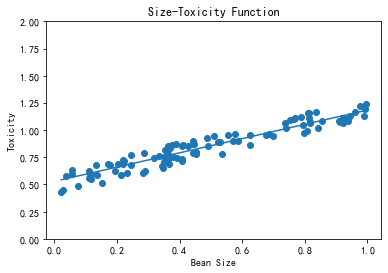

In [26]:
y_pre=w*xs+b
plt.clf()
# 设置外部背景色2
fig = plt.figure()
fig.set_facecolor('white')
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.ylim(0, 2)
plt.scatter(xs, ys)
plt.plot(xs, y_pre)

plt.savefig("./output/04/wx+b梯度下降结果.png",dpi=200)
plt.show()
plt.show()
